# 2 Probability Distributions and Random Variables in R

Welcome to this tutorial where we will explore various probability distributions, generate random numbers, transform variables, and compute probabilities using R. This session is designed to provide practical examples to help you understand how to work with different statistical distributions in R.

_What we will cover:_

- Generating random numbers from different distributions.
- Transforming random variables.
- Visualizing distributions using histograms and density plots.
- Calculating probabilities and quantiles.
- Testing for normality.
- Working with real-world data (IBM stock prices).
- Homework exercises.

Let’s get started!

---

## 2.1 Generating Normal Random Numbers and Z-scores

Objective: Create normal random numbers and convert them to Z-scores.

### 2.1.1 Background Theory

A Z-score represents the number of standard deviations a data point is from the mean. It is
calculated using the formula:

$$
Z = \frac{𝑥 − \mu}{\sigma}
$$

Where:

- $Z$ is the random variable
- $\mu$ is the mean
- $\sigma$ is the standard deviation.

Transforming a random variable $x \sim N (\mu, \sigma^2)$ to a standard normal variable $Z \sim N (0, 1)$ allows us
to use standard normal distribution tables and functions.

### 2.1.2 Activity 1

Generate normal random numbers and convert them to z-scores.

### 2.1.3 Set parameters

In [8]:
# Set parameters
n_samples <- 100000
mean_x <- 15
var_x <- 3
sd_x <- sqrt(var_x)

### 2.1.4 Generate random numbers

In [9]:
# Generate random numbers
xi <- rnorm(n = n_samples, mean = mean_x, sd = sd_x)

### 2.1.5 Verify the mean and standard deviation

In [10]:
# Verify the mean and standard deviation
mean_xi <- mean(xi)
sd_xi <- sd(xi)
print(paste("Mean of xi:", mean_xi))  # Should be close to 15
print(paste("Standard deviation of xi:", sd_xi))  # Should be close to sqrt(3)

[1] "Mean of xi: 14.9902668371641"
[1] "Standard deviation of xi: 1.72951993621837"


### 2.1.6 Transform to z-scores

In [11]:
# Transform to z-scores
z <- (xi - mean_xi) / sd_xi

### 2.1.7 Verify the transformation

In [12]:
# Verify the transformation
mean_z <- mean(z)
sd_z <- sd(z)
print(paste("Mean of z:", mean_z))  # Should be close to 0
print(paste("Standard deviation of z:", sd_z)) # Should be close to 1

[1] "Mean of z: -8.40677527591538e-17"
[1] "Standard deviation of z: 1.00000000000001"


### 2.1.8 Plot histogram of z-scores

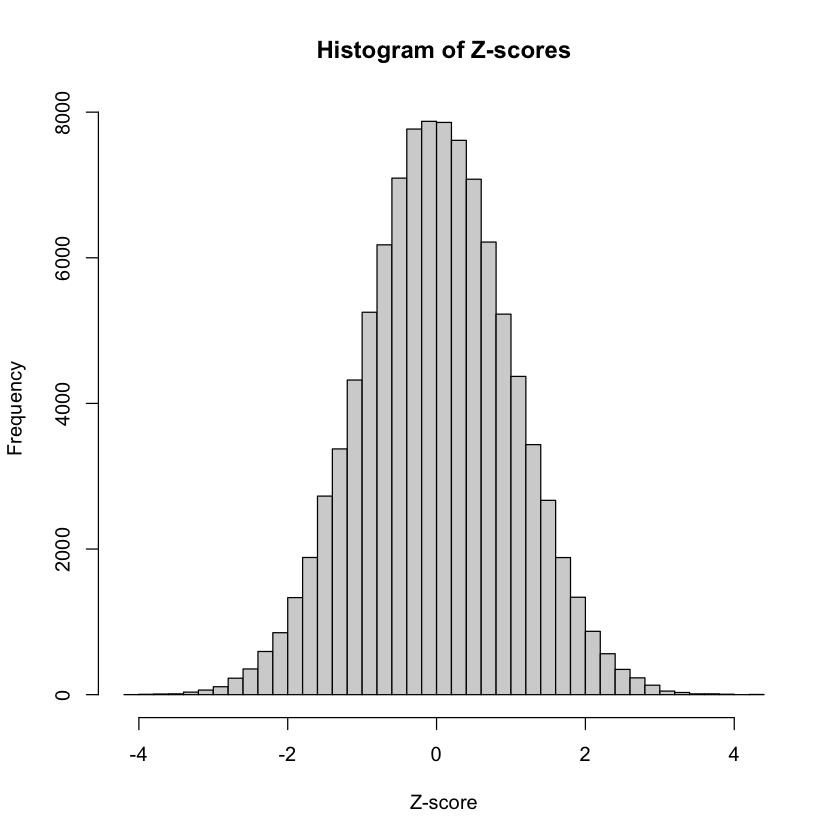

In [13]:
# Plot histogram of z-scores
hist(z, main = "Histogram of Z-scores", xlab = "Z-score", breaks = 50)

## 2.2 Generating Random Numbers from Various Distributions

Objective:

1. Generate random numbers from different distributions and visualize them.
2. Plot the density functions.
3. Calculate probabilities for certain events.

### 2.2.1 Background Theory

Understanding different probability distributions is essential in statistics. Common distributionsinclude:

- Binomial Distribution: Describes the number of successes in a fixed number of independent
Bernoulli trials (yes/no experiments).
- Weibull Distribution: Often used in reliability analysis and survival studies.
- Chi-Square Distribution: Used in hypothesis testing and constructing confidence intervals.

### 2.2.2 Load necessary library

First, we need to install necessary libraries for this exercise, such as `ggplot2`, `quantmod`. You should provide a character vector containing the package names.

In [31]:
install.packages(c("ggplot2", "quantmod"))


The downloaded binary packages are in
	/var/folders/pb/_45838w13ds5fcrv51k520zh0000gn/T//Rtmp7Izw5a/downloaded_packages


Then, we can load the `ggplot2` library.

In [17]:
library(ggplot2)

### 2.2.3 Set sample size

In [18]:
# Set sample size
n <- 3000

### 2.2.4 ($i$) Generate random numbers and visualize them

1. Binomial Distribution

#### Parameters

In [19]:
# Parameters
size_bin1 <- 10
prob_bin1 <- 0.7

#### Generate random numbers

In [21]:
# Generate random numbers
bin_r1 <- rbinom(n = n, size = size_bin1, prob = prob_bin1)

#### Visualize

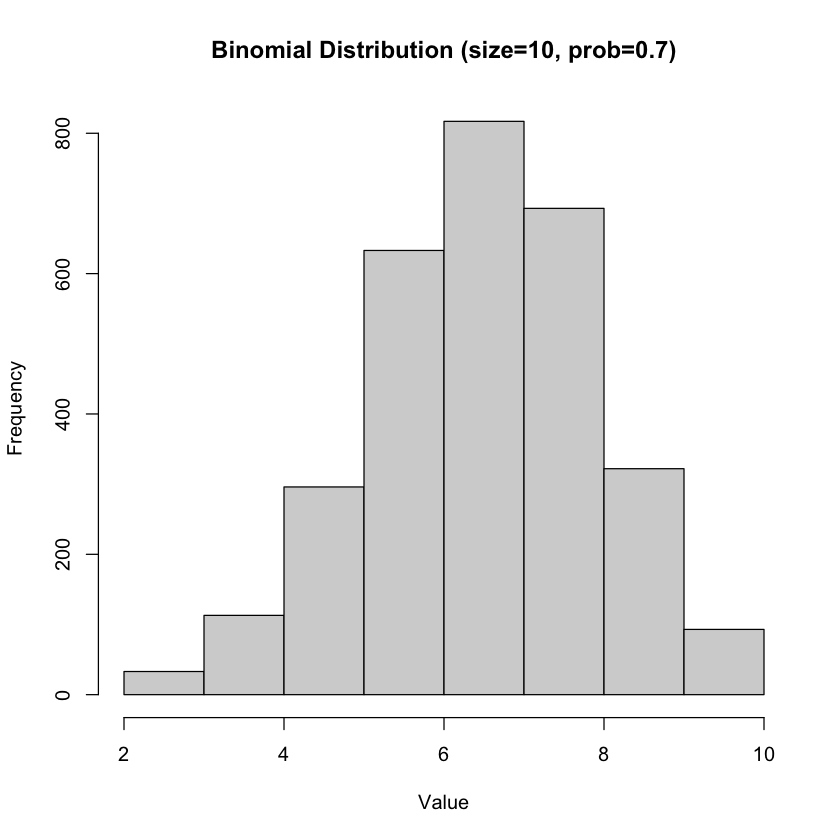

In [22]:
# Visualize Binomial Distribution
hist(bin_r1, main = "Binomial Distribution (size=10, prob=0.7)", xlab = "Value", breaks = size_bin1 + 1)

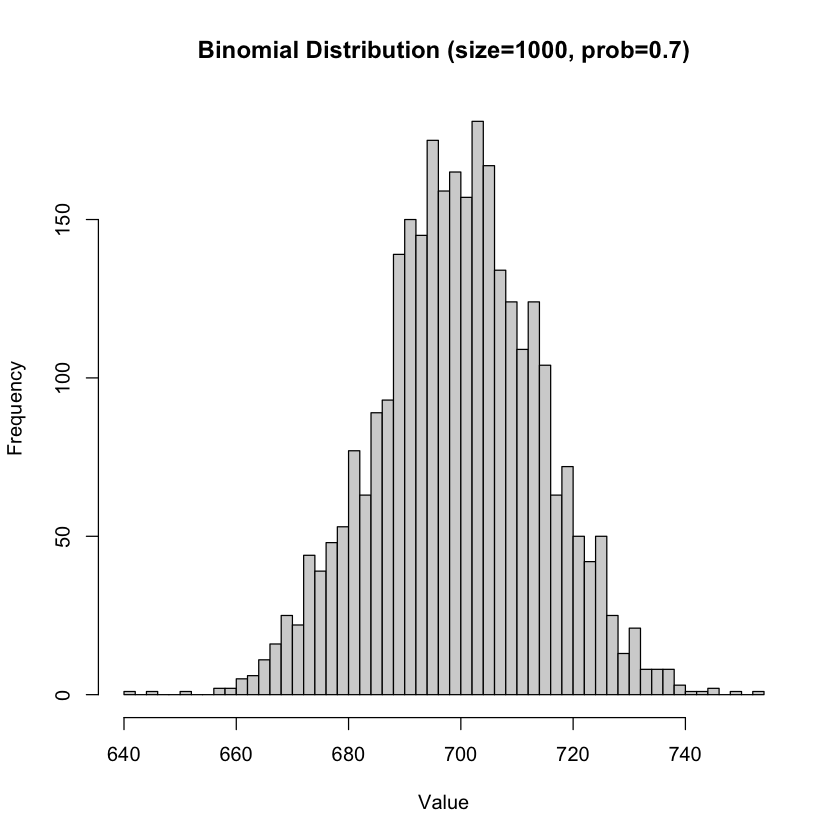

In [23]:
# Larger Binomial Distribution size
size_bin2 <- 1000
prob_bin2 <- 0.7
bin_r2 <- rbinom(n = n, size = size_bin2, prob = prob_bin2)
hist(bin_r2, main = "Binomial Distribution (size=1000, prob=0.7)", xlab = "Value", breaks = 50)

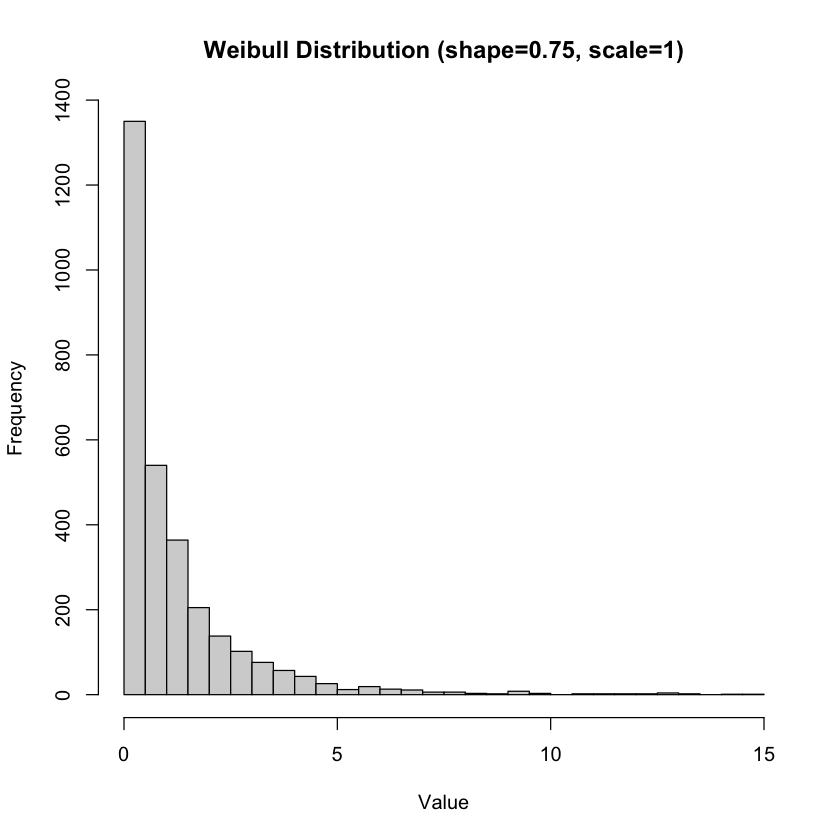

In [24]:
# Weibull Distribution
shape_weib <- 0.75
scale_weib <- 1
weib_r <- rweibull(n, shape = shape_weib, scale = scale_weib)
hist(weib_r, main = "Weibull Distribution (shape=0.75, scale=1)", xlab = "Value", breaks = 50)

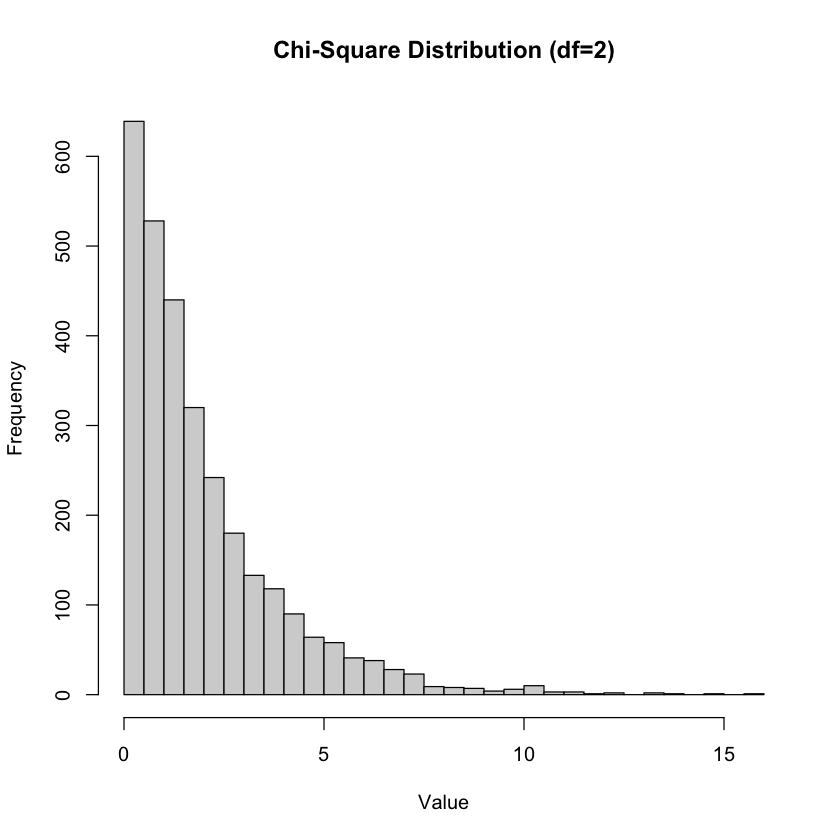

In [25]:
# Chi-Square Distribution (df = 2)
df_chi1 <- 2
chi_r1 <- rchisq(n, df = df_chi1)
hist(chi_r1, main = paste("Chi-Square Distribution (df=", df_chi1, ")", sep=""), xlab = "Value", breaks = 50)

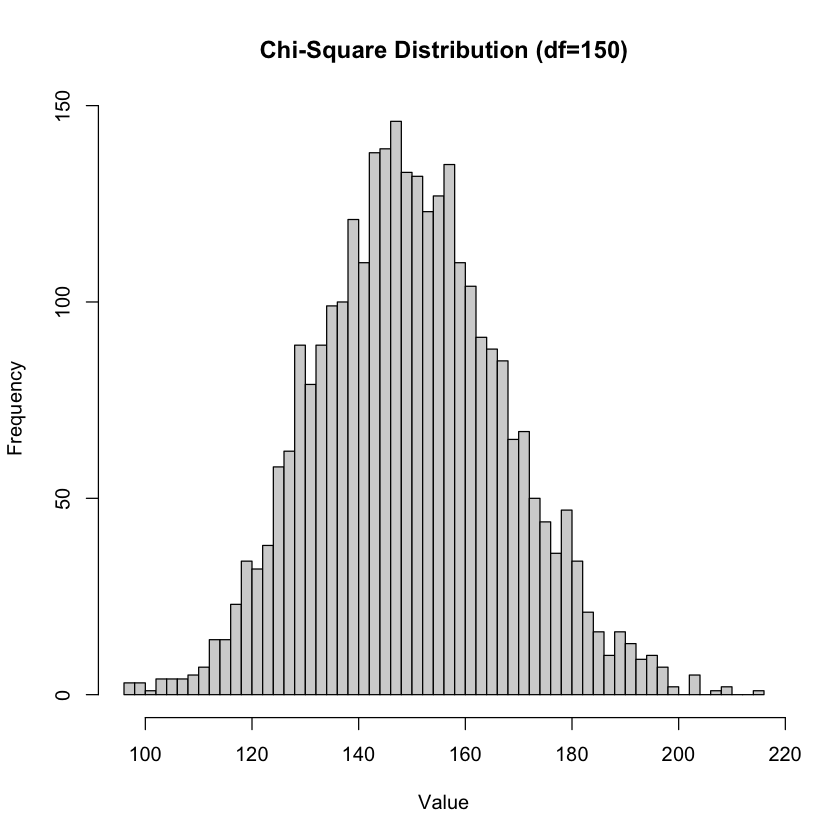

In [26]:
# Chi-Square Distribution (df = 150)
df_chi2 <- 150
chi_r2 <- rchisq(n, df = df_chi2)
hist(chi_r2, main = paste("Chi-Square Distribution (df=", df_chi2, ")", sep=""), xlab = "Value", breaks = 50)

### 2.2.2 ($ii$) Plot the Density Functions

To plot the density function of a distribution, we need to:

- Define a sequence of $x$-values over the domain.
- Compute the density values using the appropriate density function (prefix d in R).
- Plot the density using `ggplot2`.

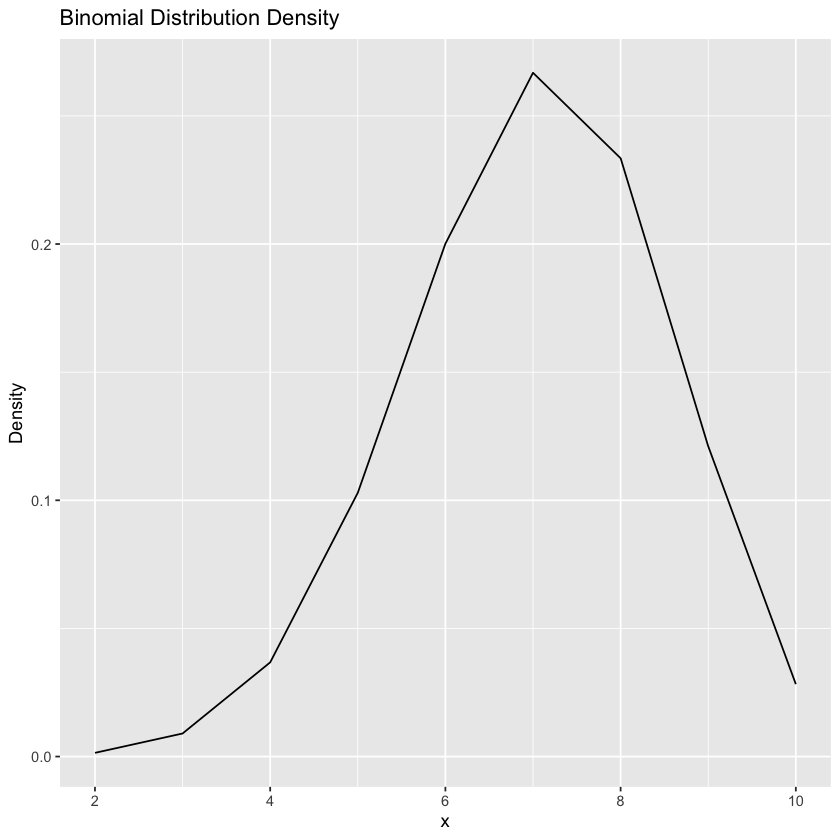

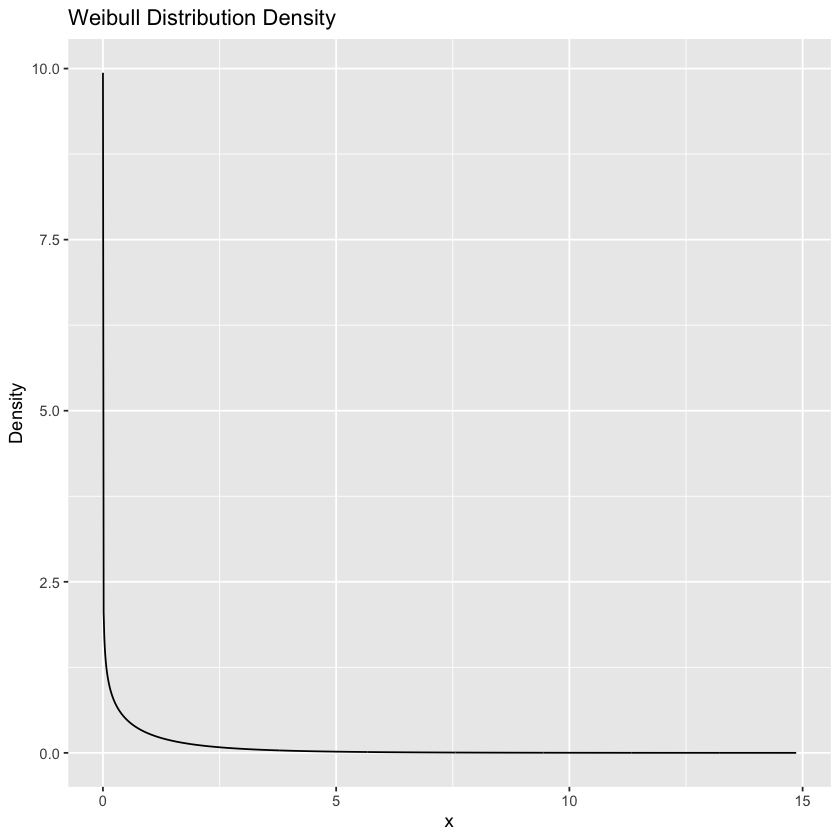

In [27]:
# 1. Binomial Distribution Density Plot
x_bin <- seq(min(bin_r1), max(bin_r1), by = 1)
dens_binom <- data.frame(x = x_bin, y = dbinom(x = x_bin, size = size_bin1, prob = prob_bin1))
ggplot(dens_binom, aes(x, y)) + geom_line() + ggtitle("Binomial Distribution Density") + xlab("x") + ylab("Density")

# 2. Weibull Distribution Density Plot
x_weib <- seq(min(weib_r), max(weib_r), length.out = 1000)
dens_weib <- data.frame(x = x_weib, y = dweibull(x_weib, shape = shape_weib, scale = scale_weib))
ggplot(dens_weib, aes(x, y)) + geom_line() + ggtitle("Weibull Distribution Density") + xlab("x") + ylab("Density")

# Homework

[1] "P(Return <U+2264> 2%): 0.972225878048976"
[1] "P(Return <U+2264> -2%): 0.0244804479118815"
[1] "Maximum return at 95% confidence: 0.0172219923576002"
[1] "Minimum loss at 5% probability: -0.0166619923576002"


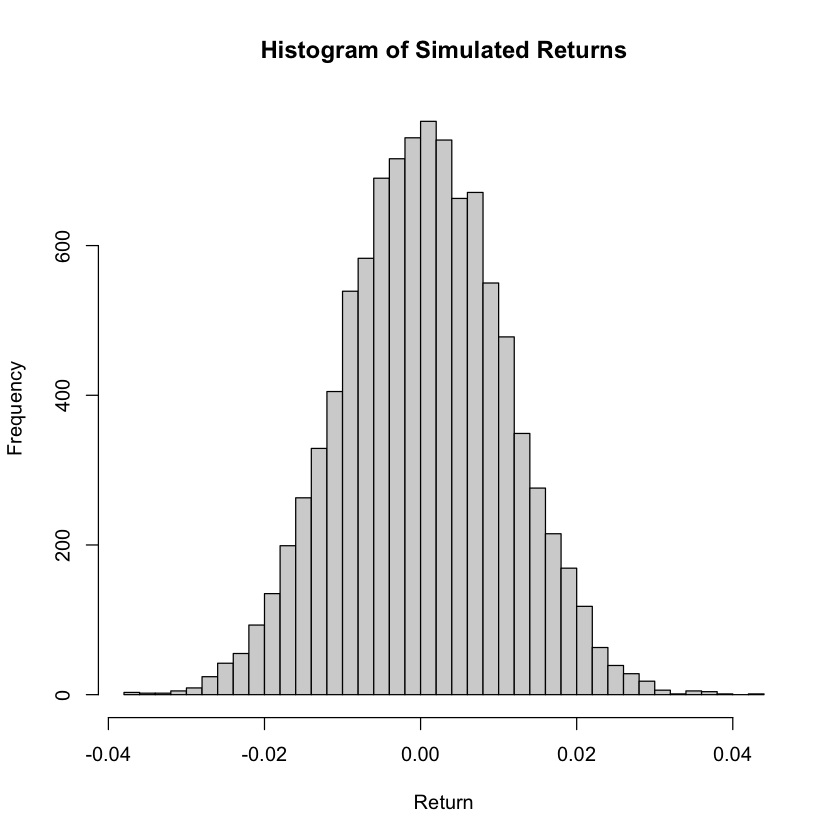

In [28]:
# Parameters for stock returns
mean_ret <- 0.00028 # 0.028%
sd_ret <- 0.0103 # 1.03%
n_returns <- 10000

# Generate random returns
returns <- rnorm(n = n_returns, mean = mean_ret, sd = sd_ret)
hist(returns, main = "Histogram of Simulated Returns", xlab = "Return", breaks = 50)

# a) Probability that returns will not exceed 2%
prob_a <- pnorm(q = 0.02, mean = mean_ret, sd = sd_ret)
print(paste("P(Return ≤ 2%):", prob_a))

# b) Probability of losing 2% or more
prob_b <- pnorm(q = -0.02, mean = mean_ret, sd = sd_ret)
print(paste("P(Return ≤ -2%):", prob_b))

# c) Maximum return with 95% probability
max_return_95 <- qnorm(0.95, mean = mean_ret, sd = sd_ret)
print(paste("Maximum return at 95% confidence:", max_return_95))

# d) Minimum loss at 5% probability (95% Value-at-Risk)
min_loss_95 <- qnorm(0.05, mean = mean_ret, sd = sd_ret)
print(paste("Minimum loss at 5% probability:", min_loss_95))

Loading required package: xts

Loading required package: zoo


Attaching package: 'zoo'


The following objects are masked from 'package:base':

    as.Date, as.Date.numeric


Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



[1] "IBM"

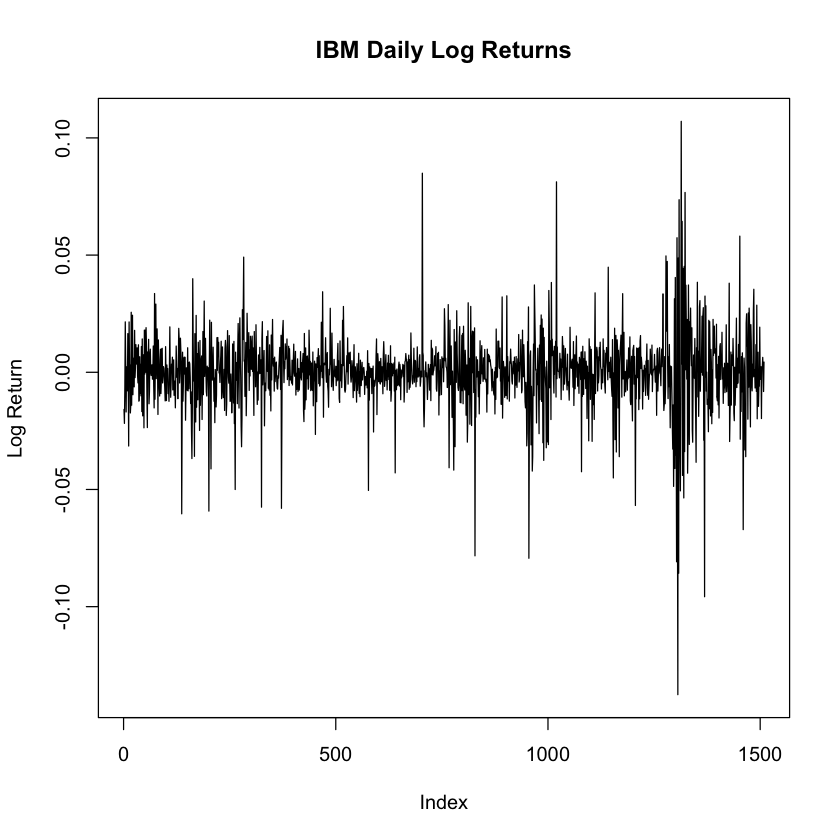


	Shapiro-Wilk normality test

data:  rets
W = 0.88408, p-value < 2.2e-16



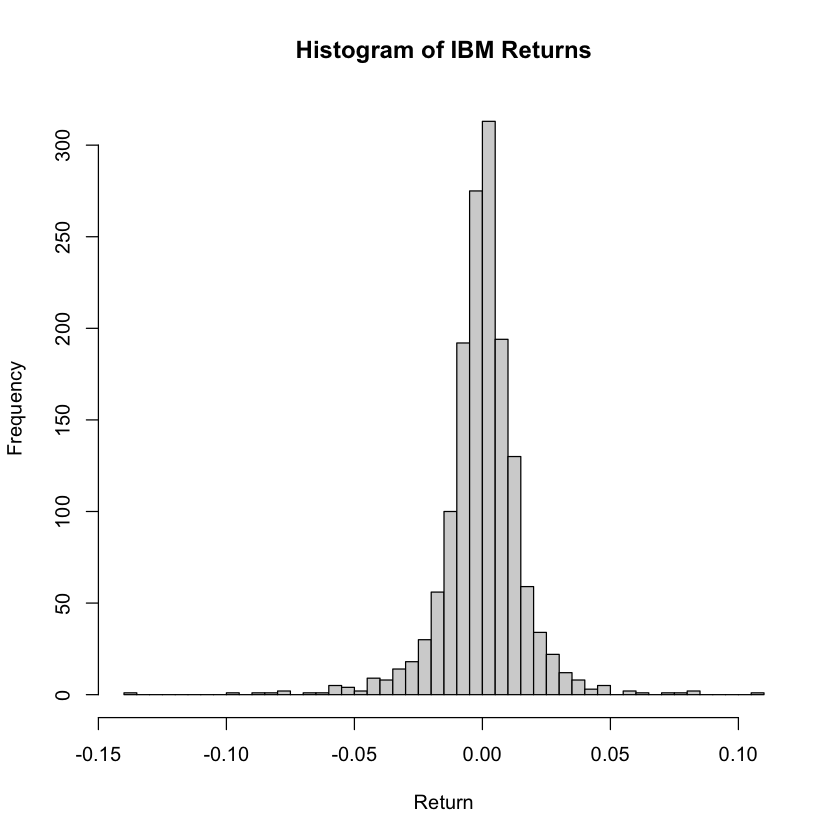

In [29]:
library(quantmod)

# Get IBM stock data
getSymbols("IBM", from = "2015-01-01", to = "2020-12-31")
AdjClose <- Ad(IBM)

# Compute log returns
prices <- coredata(AdjClose)
rets <- diff(log(prices))

# Plot returns
plot(rets, type = "l", main = "IBM Daily Log Returns", ylab = "Log Return")

# Histogram of returns
hist(rets, main = "Histogram of IBM Returns", xlab = "Return", breaks = 50)

# Normality test
shapiro_result_ibm <- shapiro.test(rets)
print(shapiro_result_ibm)

### 2.2.3 ($iii$) Calculating Probabilities

For a given distribution, we can calculate probabilities such as:

- $P(X = x)$: Probability that $X$ equals a specific value (use *density functions*).
- $P(X \leq x)$: Cumulative probability up to $x$ (use *cumulative distribution functions* with the prefix `p`).
- $P(X > x)$: Probability that $X$ is greater than $x$ (1 - cumulative probability).

#### Example: Calculating with the Weibull Distribution

# Tutorial: Probability Distributions and Random Variables in R

Welcome to this tutorial where we will explore various probability distributions, generate random numbers, transform variables, and compute probabilities using R. This session is designed to provide practical examples to help you understand how to work with different statistical distributions in R.

## What we will cover:
- Generating random numbers from different distributions
- Transforming random variables
- Visualizing distributions using histograms and density plots
- Calculating probabilities and quantiles
- Testing for normality
- Working with real-world data (IBM stock prices)
- Homework exercises

Let’s get started!

---

## 1. Question 1: Generating Normal Random Numbers and Z-scores
### Objective: 
Create normal random numbers and convert them to z-scores.

### 1.1 Background Theory
A z-score represents the number of standard deviations a data point is from the mean. It is calculated using the formula:

    z = (x - μ) / σ

Where:
- **x** is the random variable
- **μ** is the mean
- **σ** is the standard deviation

Transforming a random variable \( x \sim N(μ, σ^2) \) to a standard normal variable \( z \sim N(0, 1) \) allows us to use standard normal distribution tables and functions.

---

## 2. Question 2: Generating Random Numbers from Various Distributions
### Objective:
1. Generate random numbers from different distributions and visualize them.
2. Plot the density functions.
3. Calculate probabilities for certain events.

### 2.1 Background Theory
Understanding different probability distributions is essential in statistics. Common distributions include:

- **Binomial Distribution**: Describes the number of successes in a fixed number of independent Bernoulli trials (yes/no experiments).
- **Weibull Distribution**: Often used in reliability analysis and survival studies.
- **Chi-Square Distribution**: Used in hypothesis testing and constructing confidence intervals.

---

## 3. Question 3: Modeling Stock Returns and Calculating Probabilities
### Scenario:
You have determined that the daily returns of a stock can be modeled as a Normal random variable with parameters:
- $\mu = 0.028\%$
- $\sigma = 1.03\%$

### Questions:
a) What is the probability that your returns will not exceed 2%?  
b) What is the probability that you will lose 2% or more of your investment?  
c) With 95% probability, what is the maximum return you will get on your investment?  
d) With 5% probability, what is the minimum you will lose (i.e., what is the 95% Value-at-Risk)?

---

## 4. Working with Real-World Data: IBM Stock Prices
### Objective:
Fetch real stock price data, compute returns, and test for normality.

---

## 5. Homework

### 5.1 Density Plots:
- For the Chi-Square distributions generated earlier `(df = 2 and df = 150)`, plot the density functions.
- Observe how the shape changes with different degrees of freedom.

### 5.2 Calculating Probabilities:
- For the Weibull distribution with shape = 25 and scale = 12, calculate $P(10 < X \leq 12)$ and plot this probability area on the density curve.

### 5.3 Normality Tests:
- Perform normality tests (Shapiro-Wilk) for the binomial and chi-square random numbers generated.
- Discuss the results.

### 5.4 Stock Return Analysis:
- Using the IBM returns data:
    - Perform the Jarque-Bera test for normality.
    - Interpret the results.
    - Discuss whether the normal distribution is a good fit for the stock returns.

### 5.5 Exercise from External Resource:
- Given $\mu = 61$ and $\sigma^2 = 196$, calculate $P(X \leq 40)$ and interpret the result.

---

## 6. Solutions

### Solution to Homework 1: Density Plots for Chi-Square Distributions
1. **Chi-Square Distribution with df = 2**
2. **Chi-Square Distribution with df = 150**

### Solution to Homework 2: Calculating Probabilities for Weibull Distribution

### Solution to Homework 3: Normality Tests

### Solution to Homework 4: Stock Return Analysis

### Solution to Homework 5: Exercise from External Resource

---

**End of Tutorial class: Week 2**